### Getting Data

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai import *
from fastai.callbacks import CSVLogger, SaveModelCallback
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [ ]:
!wget https://www.dropbox.com/s/u83ae1efaah2w9o/UCMercedLanduse.zip
!unzip UCMercedLanduse.zip


--2020-10-01 10:47:53--  https://www.dropbox.com/s/u83ae1efaah2w9o/UCMercedLanduse.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u83ae1efaah2w9o/UCMercedLanduse.zip [following]
--2020-10-01 10:47:54--  https://www.dropbox.com/s/raw/u83ae1efaah2w9o/UCMercedLanduse.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc36c6dfe43584d2ba16e53571f5.dl.dropboxusercontent.com/cd/0/inline/BAao9ls70XFm-n7yVOl8H0eG5nTVC0mFGmZ7ui9Dd7Zus6KwbeHg3HQIkMAnlqp3nGSIix3zTNvFrihhUgTYxvz-IW8uGCdpQEXzlb-0xDAtlO0w8PKmko7FLiksSkqq91Y/file# [following]
--2020-10-01 10:47:54--  https://uc36c6dfe43584d2ba16e53571f5.dl.dropboxusercontent.com/cd/0/inline/BAao9ls70XFm-n7yVOl8H0eG5nTVC0mFGmZ7ui9Dd7Zus6KwbeHg3HQIkMAnlqp3nGSIix3zTNvFrihhUgTYxvz-IW

In [ ]:
df = pd.read_csv("UCMerced/multilabels.txt", sep="\t")
df.head()


,IMAGE\LABEL,airplane,bare-soil,buildings,cars,chaparral,court,dock,field,grass,mobile-home,pavement,sand,sea,ship,tanks,trees,water
0,agricultural00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,agricultural01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,agricultural02,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,agricultural03,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,agricultural04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,agricultural05,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,agricultural06,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,agricultural07,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,agricultural08,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,agricultural09,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(2100, 18)

In [ ]:
class_count = pd.DataFrame(df.sum(axis=0)).reset_index()
class_count.columns = ["class", "Count"]
class_count.drop(class_count.index[0], inplace=True)
class_count

,class,Count
1,airplane,100
2,bare-soil,718
3,buildings,691
4,cars,886
5,chaparral,115
6,court,105
7,dock,100
8,field,103
9,grass,975
10,mobile-home,102


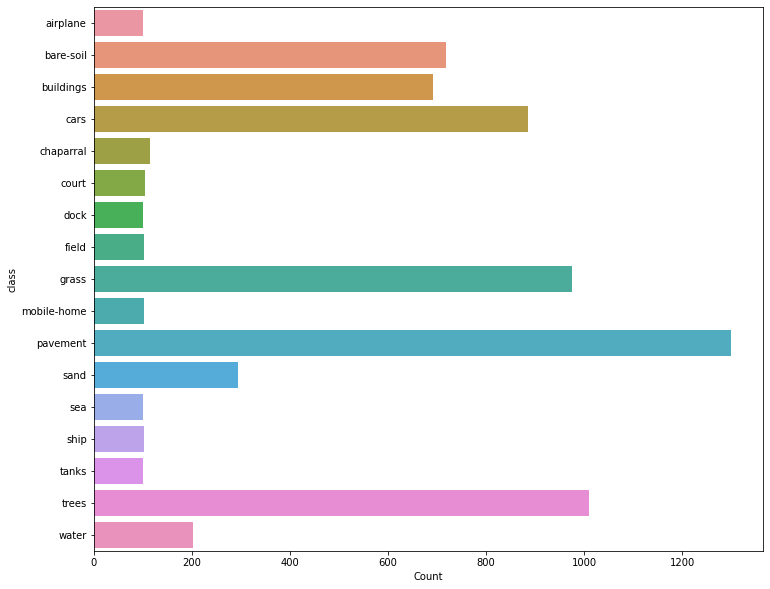

In [ ]:
fig, ax= plt.subplots(figsize=(12,10))
sns.barplot(y="class", x="Count",  data=class_count, ax=ax);

### Training 

In [ ]:
path =  Path("UCMerced")
data_src = (ImageList.from_df(df=df, path=path, folder='images', suffix=".tif")
            .split_by_rand_pct(0.2)
            
            .label_from_df(cols=list(class_count['class']), label_cls=MultiCategoryList, one_hot=True))

In [ ]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [ ]:
data = (data_src.transform(tfms, size=256).databunch().normalize(imagenet_stats))

In [ ]:
data.c

17

In [ ]:
f_score = partial(fbeta, thresh=0.45)
learn = cnn_learner(data, models.resnet34, metrics=[accuracy_thresh, f_score],
                    callback_fns=[ShowGraph, SaveModelCallback])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 128, 128]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 128, 128]       128        True      
______________________________________________________________________
ReLU                 [64, 128, 128]       0          False     
______________________________________________________________________
MaxPool2d            [64, 64, 64]         0          False     
______________________________________________________________________
Conv2d               [64, 64, 64]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
ReLU                 [64, 64, 64]         0          False     
___________________________________________________

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.746334,0.432727,0.811205,0.763273,00:18
1,0.429183,0.148315,0.937255,0.856155,00:17
2,0.277405,0.117626,0.950420,0.897375,00:17
3,0.199876,0.107028,0.953081,0.899589,00:18
4,0.155158,0.103366,0.955322,0.908443,00:17


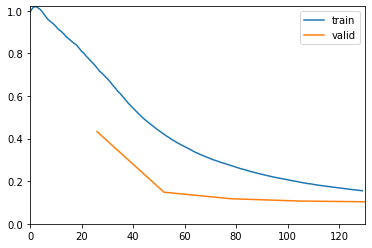

Better model found at epoch 0 with valid_loss value: 0.4327271580696106.
Better model found at epoch 1 with valid_loss value: 0.14831514656543732.
Better model found at epoch 2 with valid_loss value: 0.11762644350528717.
Better model found at epoch 3 with valid_loss value: 0.10702764242887497.
Better model found at epoch 4 with valid_loss value: 0.10336586087942123.


In [ ]:
learn.fit_one_cycle(5, 1e-2)

### Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
import os
sys.path.append('/content/gdrive/My Drive/flask_apps')
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/gdrive


In [ ]:
from fastai.vision import *
from fastai import *
from fastai.callbacks import CSVLogger, SaveModelCallback
import matplotlib.pyplot as plt
import seaborn as sns
import torch
model = load_learner('/content/gdrive/My Drive/flask_apps')
print(" * Model loaded!")

 * Model loaded!


In [ ]:
!wget https://www.dropbox.com/s/6tt0t61uq2w1n3s/test.zip
!unzip test.zip

--2020-10-03 08:19:18--  https://www.dropbox.com/s/6tt0t61uq2w1n3s/test.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6tt0t61uq2w1n3s/test.zip [following]
--2020-10-03 08:19:18--  https://www.dropbox.com/s/raw/6tt0t61uq2w1n3s/test.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca42b7da144a707b27d5a38f81f.dl.dropboxusercontent.com/cd/0/inline/BAikiCBXq__enIfVxU0VMwHGF00rcVfLGLLkanC-F02LbQX9bGV1oe1TOf7GcZT3COi0I1twiQ-qL5DRSZiNUXEKC1nDPHzQhcvSr7t3fSjxS1O3sOfWlraBmx03xduMd08/file# [following]
--2020-10-03 08:19:18--  https://uca42b7da144a707b27d5a38f81f.dl.dropboxusercontent.com/cd/0/inline/BAikiCBXq__enIfVxU0VMwHGF00rcVfLGLLkanC-F02LbQX9bGV1oe1TOf7GcZT3COi0I1twiQ-qL5DRSZiNUXEKC1nDPHzQhcvSr7t3fSjxS1O3sOfWlraBmx03xd

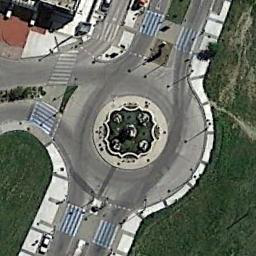

In [ ]:
img = open_image("/content/test/roundabout_086.jpg")
img

In [ ]:
pred_class,pred_idx,outputs = model.predict(img)

MultiCategory tensor([0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

In [ ]:
print(pred_class)

bare-soil;cars;grass;pavement;trees


In [ ]:
ENDC = '\033[m'
Tcolor = "\033[1;32m"
Tbold = '\033[;1m'
Tcyan = "\033[1;34m" 

In [ ]:
import numpy as np
from matplotlib import *
from pylab import *
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = open_image(path)
  pred_class,pred_idx,outputs = model.predict(img)
  print(Tcolor + "In this image I see:" , ENDC, pred_class, Tcyan, ENDC, "PS: I'm not perfect; to improve me try to use other techniques!")
  img.show()

Saving beach93.tif to beach93.tif


NameError: ignored